# Regularization Exercises


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

In [7]:
from __future__ import print_function
import os
#Create data folder and copy  "X_Y_Sinusoid_Data.csv" and "Ames_Housing_Sales.csv"
data_path = ['data']

## Question 1

* Import the data. 

* Print the first five rows and shape of the dataset.

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [10]:
import pandas as pd
import numpy as np


file_path = os.sep.join(['C:\\Users\\User\\Desktop\\X_Y_Sinusoid_Data.csv'])
df = pd.read_csv(file_path)
df

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121
5,0.289299,0.498330
6,0.342805,0.597502
7,0.345499,0.629410
8,0.386477,0.822705
9,0.430047,0.557581


In [17]:
#create 100 spaced x data points over the range of 0 to 1 using linspace method 
X_real = np.linspace(0, 1, 100)

In [18]:
#calculate y value by using sin() method which is trigonometric sine and pi which is pi = 3.14...
Y_real = np.sin(2 * np.pi * X_real)

In [19]:
#rename the X_real and Y_real columns to x and y
da = pd.DataFrame({'X_real': X_real, 'Y_real': Y_real})
da.rename(columns={'X_real': 'x', 'Y_real': 'y'}, inplace=True)

In [20]:
da.head()

,x,y
0,0.000000,0.000000
1,0.010101,0.063424
2,0.020202,0.126592
3,0.030303,0.189251
4,0.040404,0.251148


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

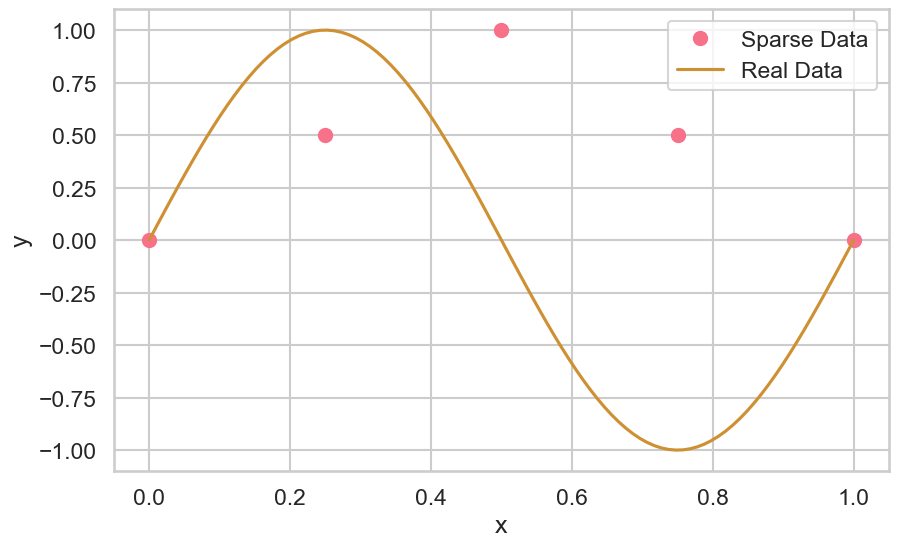

In [22]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette("husl", 8)

##write code here
# Create sparse data (x_sparse, y_sparse)
x_sparse = np.array([0, 0.25, 0.5, 0.75, 1.0])  # Replace with your sparse x values
y_sparse = np.array([0, 0.5, 1.0, 0.5, 0])       # Replace with your sparse y values

# Create real data (x_real, y_real)
x_real = np.linspace(0, 1, 100)
y_real = np.sin(2 * np.pi * x_real)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_sparse, y_sparse, 'o', label='Sparse Data', markersize=10)
plt.plot(x_real, y_real, label='Real Data')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()











## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

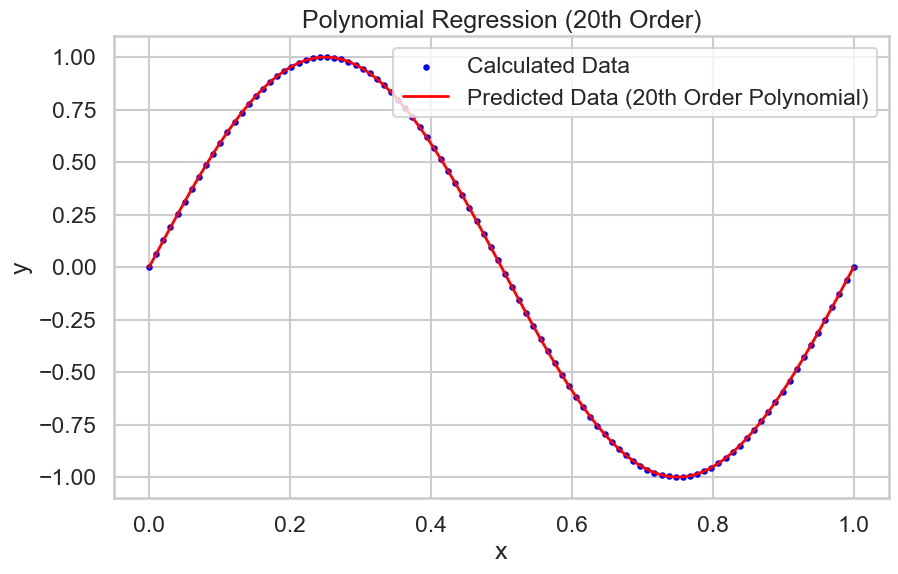

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have already defined x_real and y_real as your calculated data
# x_real and y_real are assumed to be 1D arrays, so reshape them to 2D arrays
x_real = x_real.reshape(-1, 1)
y_real = y_real.reshape(-1, 1)

# Create 20th order polynomial features
poly_features = PolynomialFeatures(degree=20)
X_poly = poly_features.fit_transform(x_real)

# Fit the data using linear regression
lr = LinearRegression()
lr.fit(X_poly, y_real)

# Predict the y values based on the polynomial features
y_pred = lr.predict(X_poly)

# Plot the resulting predicted value compared to the calculated data
plt.figure(figsize=(10, 6))
plt.scatter(x_real, y_real, label='Calculated Data', color='blue', s=10)
plt.plot(x_real, y_pred, label='Predicted Data (20th Order Polynomial)', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (20th Order)')
plt.show()


## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. from sklearn.linear_model import Ridge, Lasso

What does the comparatively large magnitude of the data tell you about the role of regularization?

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.765e-02, tolerance: 4.950e-03
  model = cd_fast.enet_coordinate_descent(


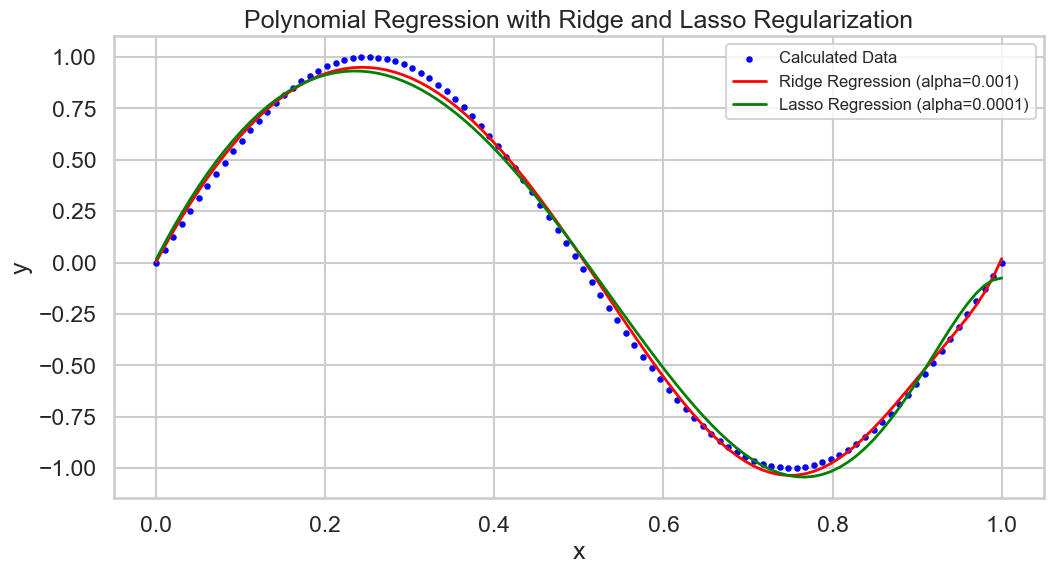

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

# Assuming you have already defined x_real and y_real as your calculated data
# x_real and y_real are assumed to be 1D arrays, so reshape them to 2D arrays
x_real = x_real.reshape(-1, 1)
y_real = y_real.reshape(-1, 1)

# Create 20th order polynomial features
poly_features = PolynomialFeatures(degree=20)
X_poly = poly_features.fit_transform(x_real)

# Ridge Regression with alpha=0.001
ridge = Ridge(alpha=0.001)
ridge.fit(X_poly, y_real)
y_pred_ridge = ridge.predict(X_poly)

# Lasso Regression with alpha=0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_poly, y_real)
y_pred_lasso = lasso.predict(X_poly)

# Plot the results
plt.figure(figsize=(12, 6))

# Calculated Data
plt.scatter(x_real, y_real, label='Calculated Data', color='blue', s=10)

# Ridge Regression
plt.plot(x_real, y_pred_ridge, label='Ridge Regression (alpha=0.001)', color='red', linewidth=2)

# Lasso Regression
plt.plot(x_real, y_pred_lasso, label='Lasso Regression (alpha=0.0001)', color='green', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fontsize=12)
plt.title('Polynomial Regression with Ridge and Lasso Regularization')
plt.show()


Regularization reduces the variance of the model without increasing the bias. Applying regularization removes and prevents overfitting, enhances the model's accuracy, and prevents the loss of data due to underfitting. Regularization is used to prevent overfitting and to minimize the adjusted loss function. When regularization is being used any model can fit appropriately on a test set and reduce the errors in the model.

As seen in question 2 the plot is overfitted, to remove and prevent overfitted we applied ridge and lasso regression. Lasso works well with datasets that have a small number of parameters. While ridge works well with datasets that have large parameters of the same value.

In [ ]:
Here are some key points to highlight from your explanation:

Variance Reduction: Regularization methods, including Ridge and Lasso, help reduce the variance of a model. This means that they make the model less sensitive to small fluctuations or noise in the training data, leading to better generalization to new, unseen data.

Bias: Importantly, regularization techniques aim to reduce variance without significantly increasing bias. Bias refers to the error introduced by approximating a real-world problem that may be extremely complex with a simplified model. Regularization methods strike a balance between fitting the training data well and maintaining model simplicity.

Overfitting Prevention: Overfitting occurs when a model learns the training data too well, capturing noise and leading to poor performance on unseen data. Regularization helps prevent overfitting by adding penalty terms to the loss function that discourage overly complex models.

Accuracy Enhancement: By preventing overfitting, regularization can enhance a model's accuracy on unseen data, making it more reliable and robust in real-world scenarios.

Loss Function Adjustment: Regularization modifies the loss function that the model optimizes during training. This adjusted loss function includes penalty terms that encourage certain properties in the model, such as small coefficients (L2 regularization in Ridge) or sparse coefficients (L1 regularization in Lasso).

Parameter Selection: The choice between Ridge and Lasso regularization depends on the characteristics of the dataset and the specific problem. Ridge is often useful when many features contribute to the outcome, while Lasso is valuable when only a subset of features is relevant, as it tends to drive some coefficients to exactly zero.

Overall, regularization techniques are powerful tools in machine learning for improving model performance and preventing common pitfalls like overfitting. The choice between Ridge, Lasso, or other regularization methods depends on the data, the problem, and the trade-offs between model complexity and generalization.